MAIN MENU:
    - TYPE 'exit' to leave
    - TYPE 'playlist' to see your playlist
    - Otherwise, enter an artist name
Enter an artist (or exit/playlist): playlist

=== PLAYLIST ===



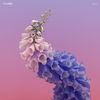

"Never Be Like You (feat. Kai)" by Flume


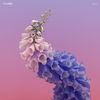

"Say It (feat. Tove Lo)" by Flume


MAIN MENU:
    - TYPE 'exit' to leave
    - TYPE 'playlist' to see your playlist
    - Otherwise, enter an artist name


In [ ]:
from IPython.display import Image
from IPython.display import Audio
import requests
import json


def makeITunesRequest(query): #accepts an artist and calls the ITunes API to get the data about the artist 
    response = requests.get('https://itunes.apple.com/search', params={
        'term': query
    })
    result = json.loads(response.text)
    return result

class Song():
    def __init__(self,song_dict):
        self.song = song_dict['trackName']
        self.artist = song_dict['artistName']
        self.artwork = song_dict['artworkUrl100']
        self.preview = song_dict['previewUrl']
        self.playlist_d = song_dict
    def __str__(self):
        return '"{}" by {}'.format(self.song, self.artist)
    def display_stuff(self):
        display(Image(x.artwork))
        print(x)
        display(Audio(x.preview))

try:
    file = open('current_playlist.txt', 'r')
    p_result = json.loads(file.read())
    playlist = []
    for d in p_result:
        playlist.append(Song(d))#iterating through dictionaries to convert into Song objects
except:
    playlist = []




while True:
    
    print("""MAIN MENU:
    - TYPE 'exit' to leave
    - TYPE 'playlist' to see your playlist
    - Otherwise, enter an artist name""")
    inp = input("Enter an artist (or exit/playlist): ")
    if inp == 'exit':
        break
    elif inp == 'playlist':
        print ("\n" + "=== PLAYLIST ===" + "\n")
        for x in playlist:
            x.display_stuff()
    else:
        artist_input = makeITunesRequest(inp)
        song_list = []
        for x in artist_input['results']:
            song_list.append(Song(x))
        for x in song_list:
            x.display_stuff()
            user_input = input("Add to playlist? (yes/no/back)")
            if user_input == 'yes':
                playlist.append(x)
                new_lst = []
                for song in playlist: #song objects to dictionaries
                    new_lst.append(song.playlist_d)
                cache_file = open('current_playlist.txt', 'w')
                cache_file.write(json.dumps(new_lst))
                cache_file.close() #closed file here
            elif user_input == 'no':
                pass
            elif user_input == 'back':
                break
    
        
    
            